In [80]:
# IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.regularizers import l1_l2
from keras.layers import Dropout



# LOAD DATA
train_images = np.load("./data/train_images.npy")
test_images = np.load("./data/test_images.npy")
train_labels = pd.read_csv("./data/train_labels.csv")

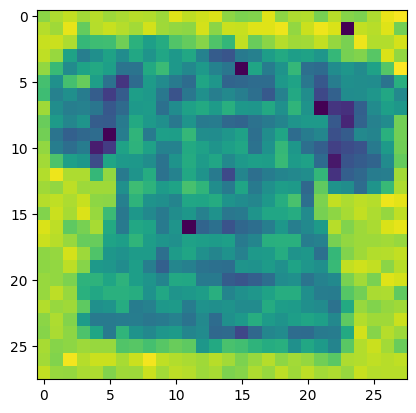

In [81]:
# DISPLAY IMAGE 
def show_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    plt.show()
# display a few images 
for i in range(1):
  show_image(train_images[i])
  

In [82]:
# x_train
X_train = train_images / 255.0
X_test = test_images / 255.0

# y_train
num_classes = 10
y_train = keras.utils.to_categorical(train_labels['label'], num_classes)

In [83]:
# MODEL
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(28, 28)),
    keras.layers.Reshape((28, 28, 1)),

    keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),  # dropout

    keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),  # dropout

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu", kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),  # regularization
    keras.layers.Dropout(0.5),  # dropout

    keras.layers.Dense(num_classes, activation="softmax")
])


In [84]:
batch_size = 128
epochs = 50

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/50
352/352 [==============================] - 10s 25ms/step - loss: 1.0886 - accuracy: 0.6138 - val_loss: 0.7184 - val_accuracy: 0.7404
Epoch 2/50
352/352 [==============================] - 8s 24ms/step - loss: 0.7191 - accuracy: 0.7468 - val_loss: 0.6461 - val_accuracy: 0.7700
Epoch 3/50
352/352 [==============================] - 9s 26ms/step - loss: 0.6538 - accuracy: 0.7734 - val_loss: 0.5939 - val_accuracy: 0.7926
Epoch 4/50
352/352 [==============================] - 9s 24ms/step - loss: 0.6081 - accuracy: 0.7906 - val_loss: 0.5560 - val_accuracy: 0.8064
Epoch 5/50
352/352 [==============================] - 8s 24ms/step - loss: 0.5797 - accuracy: 0.8021 - val_loss: 0.5320 - val_accuracy: 0.8182
Epoch 6/50
352/352 [==============================] - 8s 24ms/step - loss: 0.5584 - accuracy: 0.8113 - val_loss: 0.5267 - val_accuracy: 0.8166
Epoch 7/50
352/352 [==============================] - 9s 24ms/step - loss: 0.5428 - accuracy: 0.8163 - val_loss: 0.5106 - val_accuracy: 0.826

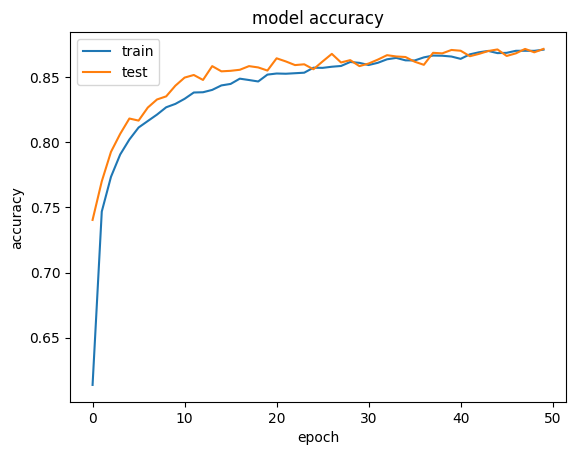

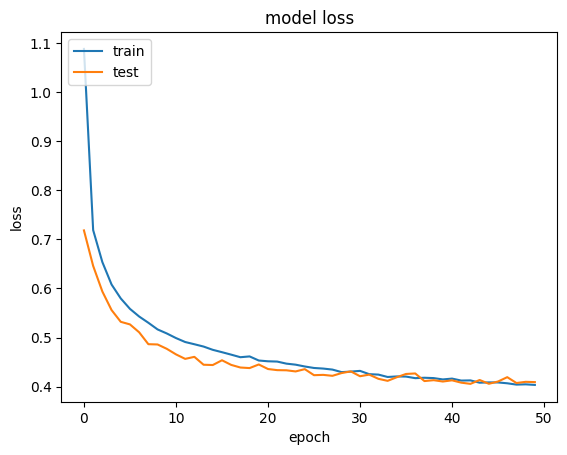

In [85]:
# SUMMARY

# accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [86]:
predictions = model.predict(X_test)

predicted_labels = np.argmax(predictions, axis=1)

# convert to CSV
submission = pd.DataFrame(columns=['ID', 'label'])
submission['ID'] = range(len(predicted_labels))
submission['label'] = predicted_labels
submission.to_csv('jxm_submission.csv', index=False)

625/625 [==============================] - 2s 3ms/step
